 **Phase 2 : Supervised learning**
 ---------------------

Our goal is to classify whether the AD is clicked on or not, in order to recommend the the factors that really affect our target in an increasing way. We will apply supervised learning by using 2 machine learning algorithm, decision tree and regression. By applying supervised learning machine algorithm, we need a class label, so we added a column named "Clicked on Ad". Clicked on Ad is a column which has 2 values, 1 represent clicked on Ad and 0 represent not clicked on Ad.

**1. Decision tree :**   
Choosing the best algorithm is not easy. Machine learning is incredibly complex and how it works varies depending on the task and the algorithm used to accomplish it.                                                                       
Below are the reasons why we choose decision tree algorithm:

-Decision trees are easy to use and explain with simple math, no complex formulas.

-They present visually all the decision alternatives for quick comparisons in a format that is easy to understand with only brief explanations.                                  

-They are intuitive and follow the same pattern of thinking that humans use when making decisions.

First we start with importing all the necessary libraries to build the model 

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scikitplot as skplt 
from sklearn.metrics import precision_score , recall_score,f1_score,accuracy_score

Then we read the dataset from the csv file to make it ready for the training 

In [3]:
data = pd.read_csv('pre_advertisment(after).csv')
data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Above average
1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Average
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Above average
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Above average
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,Average
996,996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,Below average
997,997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,Below average
998,998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,Average


after that we replace varying numerical values for Daily Internet Usage to 3 catrgories to make it clearer 
and then we replace it with numerical values for training 

In [4]:
data['Internet usage bucket'].replace(['Below average', 'Average', 'Above average'],[-1, 0, 1], inplace=True)
data.drop(['Unnamed: 0'], axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,-1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,-1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0


After converting the variables we save the changes to new csv file to use it in this phase

In [5]:
data.to_csv(r'C:\Users\96650\Desktop\pre_advertisment(after2).csv')
data = pd.read_csv('pre_advertisment(after2).csv')

Here we count the two classes that we have in the dataset to see if we need to stratify the data spliting and 
the result as we see below is that the two classes are equal and we dont need to stratify.

In [6]:
data['Clicked on Ad'].value_counts() #counting the 

0    500
1    500
Name: Clicked on Ad, dtype: int64

below we choose the feature columns and the target column to use in building the model

In [7]:
feature_cols =['Daily Time Spent on Site','Age','Area Income','Internet usage bucket'] 
x=data[feature_cols] #feature columns
y=data['Clicked on Ad'] #target column

After that we split the data as follows: 30% for testing and 70% for training and we build the model.

In [8]:
# spliting the dataset 30% for testing and 70% for training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1) 

# Create the DecisionTreeClassifier object and limitting the depth of the tree to 5 levels  
clf = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5) 

#train decision tree classifier (building the model)
clf = clf.fit(x_train,y_train)

#predict the results of the test dataset
y_pred = clf.predict(x_test)

we used the fit() function that trains the algorithm on the training data. Then, we called the decision tree 
classifier with predict() function which allow me to predict the labels of the data values on the basis of
the trained model. The parameter of predict() function is the data to be tested.

after we build the model now its time to do some statistics to see the effectiveness of the model. 
we calculate the important statistics as accuracy,recall,precision 

In [9]:
accuracy = accuracy_score(y_test,y_pred)*100
recall = recall_score(y_test,y_pred)*100
precision = precision_score(y_test,y_pred)*100
f1 = metrics.f1_score(y_test,y_pred,average='binary')*100

print('Accuracy: %.2f'% accuracy,'%')
print('Recall: %.2f'% recall,'%')
print('Precision: %.2f'% precision,'%')
print('F1 score: %.2f'% f1,'%') 

Accuracy: 95.00 %
Recall: 91.56 %
Precision: 98.60 %
F1 score: 94.95 %


As we see, the above results of the decision tree model it is considered a good model with accuracy 95%

 **Decision tree evaluation**

In the evaluation method, we used 5-fold cross validation by calling cross_val_score which will provide us with information about how well a classifier generalizes, specifically the range of expected errors of the classifier .

In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf,x,y,cv=5)
print ('cross validation score: ', score)

cross validation score:  [0.97  0.945 0.975 0.935 0.95 ]


We see the accuracy values above are high and we can say that its a good model and it generlizes very well.

After training the model on the data we calculate the accuracy of train and test data. By
passing (x_train, y_train) and (x_test, y_test) to score() function.
as we can see below the accuracy of both training and testing and it is highre than other 2 models that we build

In [11]:
trainAcc = clf.score(x_train,y_train)*100
testAcc = clf.score(x_test,y_test)*100
print('Training Accuracy: %.2f'% trainAcc, '%')
print('Testing Accuracy: %.2f'% testAcc, '%')

Training Accuracy: 98.43 %
Testing Accuracy: 95.00 %


Now we will plot the confusion matrix for the decision tree to see FP,FN,TP,TN.

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

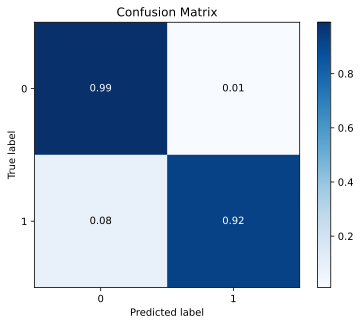

In [12]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize =True ,title='Confusion Matrix')

in our dataset 0=No and 1=Yes, as we see in the above matrix the TP:0.92 TN:0.99 FP:0.01 FN:0.08, notice that TP is 0.92 and TN is 0.99 which means that most of the data is classified correctly. Also that the FP and FN rate are very low which is a good thing that our model doesn't clasify things wrongly.


Finally,we will plot the tree to see the branching our tree.                                                            
we start with importing the library then pass the features and the decision tree model 

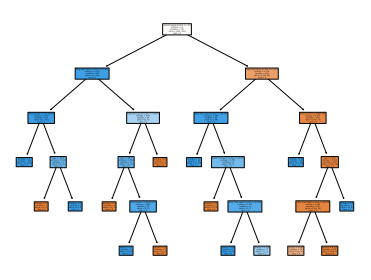

In [13]:
from sklearn import tree
%config InlineBackend.figure_format = 'svg'
plot = tree.plot_tree(clf, feature_names = feature_cols , class_names = '01', filled = True)

_______________________________________________________________________________________
**2. Linear Regression** 

It ranks among the most used machine learning regression algorithms. The output variables (future values) are predicted using a significant variable from the data set. We have chosen the linear regression because it is used when the labels on a continuous dataset are continuous.

In [14]:
data = pd.read_csv('pre_advertisment(after2).csv')
data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0,1
1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,0
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0,1
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0,1
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1,0
996,996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1,-1
997,997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1,-1
998,998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0,0


Any machine learning algorithm can be used after preprocessing the dataset in phase #1; the linear regression algorithm starts by splitting the variables into features and the target variable which is the class label. The algorithm was trained using the training data via the fit() method. Then, we called the linear regression with predict() function which allow us to predict the labels of the data values on the basis of the trained model. The parameter of predict() function is the data to be tested.

In [15]:
#Split the dataset to x and y

feature_cols =['Daily Time Spent on Site','Age','Area Income','Internet usage bucket']
x = data[feature_cols]
y = data['Clicked on Ad']

#Split the dataset into train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

#Build the train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
#Predict the response for test set
y_pred = model.predict(x_test)

**Linear regression evaluation**

After applying the Linear regression algorithm, we calculate the Mean squared error of train and test data by calling mean_squared_error function.

In [17]:
from sklearn.metrics import mean_squared_error
print("Train Error: ", mean_squared_error(y_train, model.predict(x_train)))
print("Test Error: ", mean_squared_error(y_test, model.predict(x_test)))

Train Error:  0.050595052794030176
Test Error:  0.039157395801301134


When applying the mean_squared_error() function on the training and testing data we can see that the training error is 0.05 and the testing error is 0.03 which means that the training error is higher than the testing error which leads us to a conclusion that our model's performance is an Unknown fit.
_______________________________________________________________________________

After training the model on the data we pass (x_train, y_train) and (x_test, y_test) to score() function in order to calculate the accuracy of train and test data. Which obviously will be low, since there is high test and train error.

In [18]:
#Calculate the Training and Testing accuracy 
print("Training accuracy: ", model.score(x_train, y_train)*100 , '%')
print("Testing accuracy: ", model.score(x_test, y_test)*100, '%')

Training accuracy:  79.75577908973416 %
Testing accuracy:  84.25991526427448 %


The Training Accuracy for our model is 79.75% and the Testing Accuracy is 84%, So we can see that the accuracy of our model is technically high which is a good thing.

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

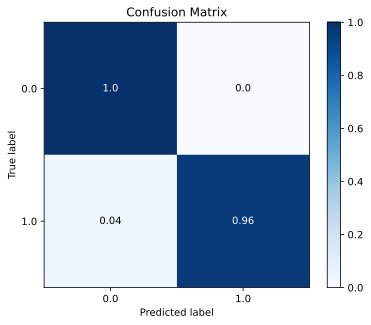

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
cutoff = 0.5                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1

# confusion_matrix(y_test_classes, y_pred_classes)
#cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test_classes,y_pred_classes, normalize =True ,title='Confusion Matrix')

To do Confusion Matrix on the linear regression model most resources showed that is doesn’t actually apply to the linear regression model since it is a continuous results. So according to it being continuous the only possiple way to apply confusion matrix on it is to tranform it into a classification model so I started the transformation by first deciding on a cutoff limit which is 0.5 since our target "Clicked on Ad" has only a 0 and 1 values so the in between cutoff limit is 0.5 .
So we divided the data based on that cutoff limit for all y_test and y_pred.

as we see in the above matrix the TP:0.96 TN:1.00 FP:0.0 FN:0.04, notice that TP is 0.96 and TN is 1 which means that most of the data is classified correctly.And FP is zero and FN rate is very low which is a good thing that linear regression model doesn't clasify things wrongly.


Then we will calculate some statistics the see the effectivness of the linear regression model

In [101]:
from sklearn.metrics import recall_score,accuracy_score
accuracy = accuracy_score(y_test_classes,y_pred_classes)*100
print('Accuracy: %.2f'% accuracy,'%')

## Calculate Sensitivity(Recall) 
# (True Positive recognition rate) TP/(TP+FN)
recall = recall_score(y_test_classes,y_pred_classes)*100
print('Senstivity(or Recall): %.2f'% recall,'%')

## Calculate Precision 
Precision = metrics.precision_score(y_test_classes,y_pred_classes, average="micro")*100
print('Precision:%.2f'%Precision,'%')

Accuracy: 98.00 %
Senstivity(or Recall): 95.70 %
Precision:98.00 %


Above it shows that the accuracy is 98% and recall is 95% and the precision is 98% which a very good accuracies for a model.

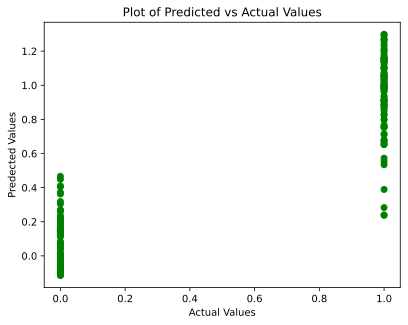

In [20]:
from matplotlib import pyplot as plt

y_true = y_test
plt.scatter(y_true, y_pred,color='g')
plt.title("Plot of Predicted vs Actual Values")
plt.xlabel('Actual Values')
plt.ylabel('Predected Values')
plt.show()

Our actual values does actually fall into only 1 and 0 values and that's obtained in the graph above where our target was "Clicked on" which contains only a 0 if it’s no and 1 if it’s yes, and the yaxis which is the predected values do actually fall in between 0 and 1 because it’s a predection. 
We can see that when the actual value is 0 the predeted values are very low and mainly fall in between 0 to 0.5, On the other hand when the actual value is 1 the predected values are high and fall largerly in between 0.6 to 1; That means that our model is predecting right.

______________________________________________________________________________________________________________________
**3.Support Vector Machine SVM**

Support vector machines also known as SVM is another algorithm widely used by machine learning people for both classification as well as regression problems but is widely used for classification tasks. It is preferred over other classification algorithms because it uses less computation and gives notable accuracy. They also use less memory because they use a subset of training points in the decision phase.
Support Vector Machine is a supervised classification algorithm where we draw a line between two different categories to differentiate between them. SVM works well with a clear margin of separation and with high dimensional space.


first start with importing libraries

In [27]:
from sklearn import svm

Then we create the classifer and fit the training data and lables

In [28]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train,y_train)
# classifier_svm = svm.SVC(kernel='rbf',  probability=True, random_state=0).fit(x_train,y_train)

**SVM evaluation**

After training the model on the data we calculate the accuracy of train and test data to evaluate the SVM model. By
passing (x_train, y_train) and (x_test, y_test) to score() function.


In [25]:
trainAcc = classifier_svm.score(x_train,y_train)*100
testAcc = classifier_svm.score(x_test,y_test)*100
print('Training Accuracy: %.2f'% trainAcc, '%')
print('Testing Accuracy: %.2f'% testAcc, '%')
print("SVM accuracy: %.2f"%classifier_svm.score(x_test, y_test))

Training Accuracy: 92.38 %
Testing Accuracy: 95.00 %
SVM accuracy: 0.95


As we can see above the accuracy of both training is 92.38% and testing 95% and it is higher than linear regression model but lower then the decision tree.Also the accuracy of SVM model is 95% which is considered high


Confusion matrix of the SVM classifier:
[[103   4]
 [  6  87]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

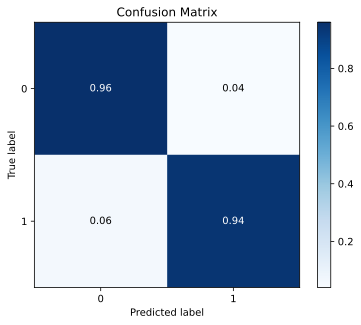

In [32]:
print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(x_test)
ConfusionMatrix = metrics.confusion_matrix(y_test,predicted_svm)
print(ConfusionMatrix)
skplt.metrics.plot_confusion_matrix(y_test,predicted_svm, normalize =True ,title='Confusion Matrix')

Confusion Matrix : 

TN (143 classified as NOT clicked correctly) , TN=0.96                                                                  
FP (only 3 classified wrongly as clicked when it is not) , FP=0.04                                                      
FN (only 28 classified wrongly as Not clicked when it Clicked), FN=0.06                                                  
TP (126 classified as Clicked correctly), TP=0.94

notice that TN and TP are high which means that most of the data is classified correctly.And FP and FN rate is very low which is a good thing that linear regression model doesn't clasify things wrongly.
_______________________________________________________________________________

After that we will calculate Senstivity,Specificity and Precision to see the effectivness of the model.

In [34]:
from sklearn import metrics, svm


print("\nClassification_report of SVM classifier:")
print(metrics.classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")
## Calculate Sensitivity(Recall) 
# (True Positive recognition rate) TP/(TP+FN)
Senstivity = ConfusionMatrix[1,1] / ( ConfusionMatrix[1,0] + ConfusionMatrix[1,1] )*100
print('Senstivity(or Recall):%.2f'%Senstivity,'%')

## Calculate Specificity 
## (True Nregative recognition rate) TN/(TN+FP)
Specificity = ConfusionMatrix[0,0] / ( ConfusionMatrix[0,0] + ConfusionMatrix[0,1] )*100
print('Specificity:%.2f'% Specificity,'%')

## Calculate Precision 
Precision = metrics.precision_score(y_test,predicted_svm, average="micro")*100
print('Precision:%.2f'% Precision,'%')


Classification_report of SVM classifier:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.96      0.94      0.95        93

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

----------------------------------------------------------------------------
Senstivity(or Recall):93.55 %
Specificity:96.26 %
Precision:95.00 %


Accuracy is the percentage of test dataset that are CORRECTLY classified

Classification report provides comperhensive summary of Precision, Recall, f1 score for each class

The support column provides number of samples of each class, for the class label 1(Clicked) is 154 and for the class label 0 is 146

- the pricision of class label 1 is near from 1 and that indicates the very LOW FalsePositive rate (only 3 classified as clicked when it is not) 




Macro Avg ( Note* Doean't take class imbalance into account) is the average Precision, recall, f1-score between calsses

meanwhile, in weighted average ; each metric is calculated With respect to how many samples there are in each class.

* This metric will favour the majority class (give a high value when one class out performs another due to having more samples)
___________________________________________________________________________________________________________________

Then, we will calculate the FPR and TPR to plot the ROC

In [82]:
# calculate the FPR and TPR for all thresholds of the classification
probs = classifier_svm.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds) 
roc_auc = metrics.auc(fpr, tpr)

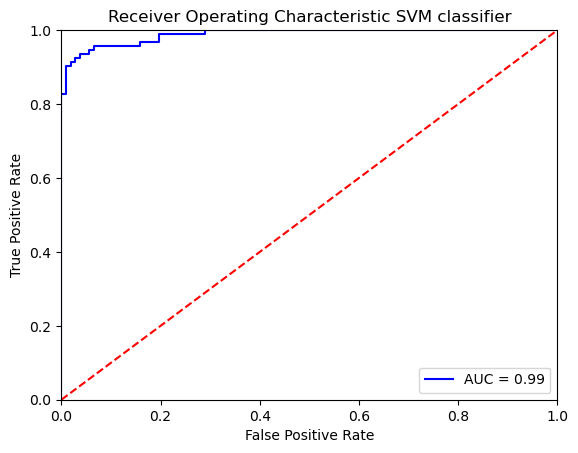

In [83]:
import matplotlib.pyplot as plt  

# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

____________________________________________________________________________________________________________________
**Comparision** 

When comparing 3 models that we built the accuracies between each the training and testing data. Decision tree model has the best results as it’s training and testing accuracies are 98% and 95% respectively, while linear regression model has training accuracy 79%, and testing accuracy 84%. And SVM model has training and testing accuracies 92% and 95%. 
This concludes that the model which is chosen by the team resulted from model evaluation is Decision tree model since it has the best training and testing accuracies among the other models. And it is obtained that it is the best model that suits our dataset.